### Import necessary packages and set up environment parameters 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from matplotlib.pyplot import table
from sklearn.model_selection import train_test_split
import nltk
#import altair as alt
import plotly

In [13]:
#nltk.download('punkt')

In [7]:
df = pd.read_csv('/Users/rashidbaset/Code/twitter-sentiment-prediction/_data/raw-data/Tweets.csv')
#df = pd.read_csv('/Users/rashidbaset/Code/Capstone/data/processed_data tweets_processed.csv')
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [15]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- Target variable: 
    - 'Airline_sentiment/positive'
- Categorical Variables:
    - 'Airline_sentiment'
    - 'NegativeReason'

In [6]:
df.tail(3)

,airline_sentiment,airline,tokens,positive,text,negativereason
8894,negative,American,"['@americanair', 'flight', 'cancel', 'flightl'...",0,@AmericanAir my flight was Cancelled Flightled...,Cancelled Flight
8895,negative,American,"['@americanair', 'leav', 'twenty', 'minut', 'l...",0,@AmericanAir leaving over 20 minutes Late Flig...,Customer Service Issue
8896,negative,American,"['@americanair', 'money', 'chang', 'flight', '...",0,"@AmericanAir you have my money, you change my ...",Customer Service Issue


In [8]:
df.sample(74)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3696,568183509577125888,negative,1.0000,Late Flight,1.0000,United,NaN,MattEngelbrecht,NaN,0,@united 1 hour since boarding began and we're ...,NaN,2015-02-18 15:01:19 -0800,"Lakewood, Colorado",Mountain Time (US & Canada)
12044,570307434113310720,negative,1.0000,Late Flight,1.0000,American,NaN,LauraMolito,NaN,0,"@AmericanAir stranded for 24 hours in MIA, Pat...",NaN,2015-02-24 11:41:02 -0800,"New York, NY",Atlantic Time (Canada)
13145,569930406591664128,neutral,1.0000,NaN,NaN,American,NaN,MarkMan23,NaN,0,@AmericanAir DM sent,"[39.91337753, -75.3408263]",2015-02-23 10:42:52 -0800,"San Diego, CA",Pacific Time (US & Canada)
5180,569275249725870080,negative,1.0000,Lost Luggage,1.0000,Southwest,NaN,goodchrism,NaN,0,@SouthwestAir lost bag on flight to Vegas. Now...,NaN,2015-02-21 15:19:30 -0800,"Boston, MA",Eastern Time (US & Canada)
2917,568832151119990784,negative,1.0000,Customer Service Issue,0.3555,United,NaN,paul_chard63,NaN,1,@united your website is a complete joke when u...,"[28.34834331, -81.48581918]",2015-02-20 09:58:47 -0800,"Celebration, FL",Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,569743891714347009,negative,1.0000,longlines,0.6818,United,NaN,DudeOfTheHouse,NaN,0,@united If you consider 50 mins for bags @ 10:...,NaN,2015-02-22 22:21:43 -0800,"Los Angeles, CA",Pacific Time (US & Canada)
8317,568490190194515970,positive,0.6737,NaN,NaN,Delta,NaN,Lane_,NaN,0,@JetBlue thanks,NaN,2015-02-19 11:19:58 -0800,South Florida,Eastern Time (US & Canada)
12097,570292403309035520,neutral,1.0000,NaN,NaN,American,NaN,pbpinftworth,NaN,0,@AmericanAir @pbpinftworth iPhone 6 64GB (not ...,"[32.82813261, -97.25115941]",2015-02-24 10:41:19 -0800,"DFW, TX",Central Time (US & Canada)
11473,568083224146149376,negative,1.0000,Customer Service Issue,0.6963,US Airways,NaN,amfnyc,NaN,0,@USAirways I've been trying for DAYS! And I d...,NaN,2015-02-18 08:22:49 -0800,NaN,Eastern Time (US & Canada)


In [12]:
import missingno

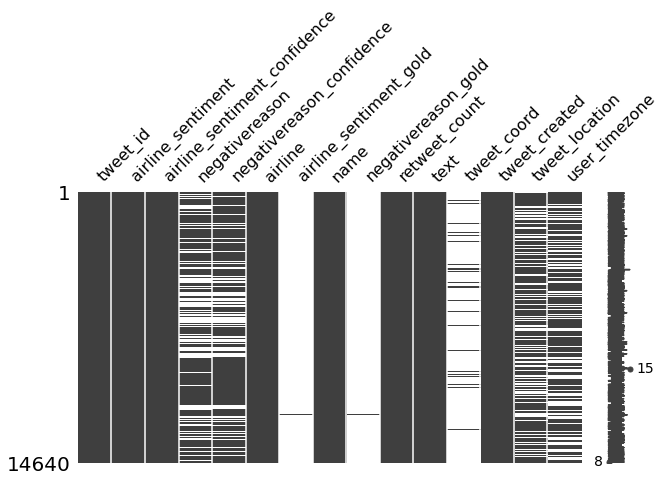

In [13]:
missingno.matrix(df, figsize = (10,5))

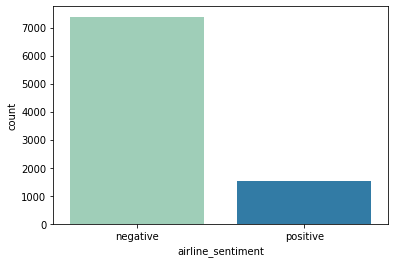

In [74]:
sns.countplot(x='airline_sentiment', data=df, palette="YlGnBu")

plt.savefig('/Users/rashidbaset/Code/Capstone/images/all_airline_sentiment_bar.png')


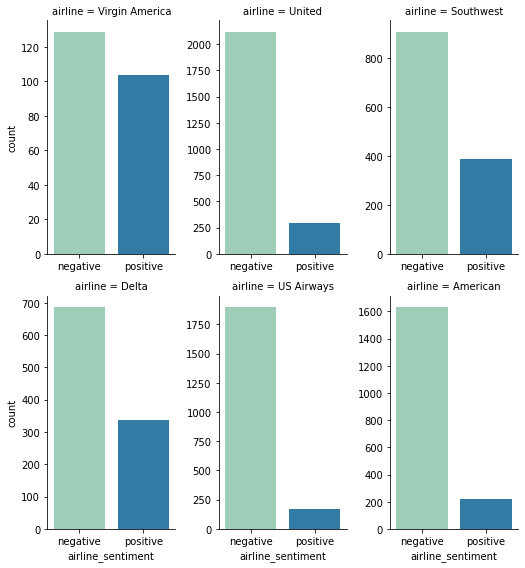

In [75]:
sns.catplot(x = 'airline_sentiment',data=df,
               order = ['negative','positive'],kind = 'count',col_wrap=3,col='airline',size=4,aspect=0.6,sharex=False,sharey=False, palette="YlGnBu")

plt.savefig('/Users/rashidbaset/Code/Capstone/images/airline_sentiment_bar.png')


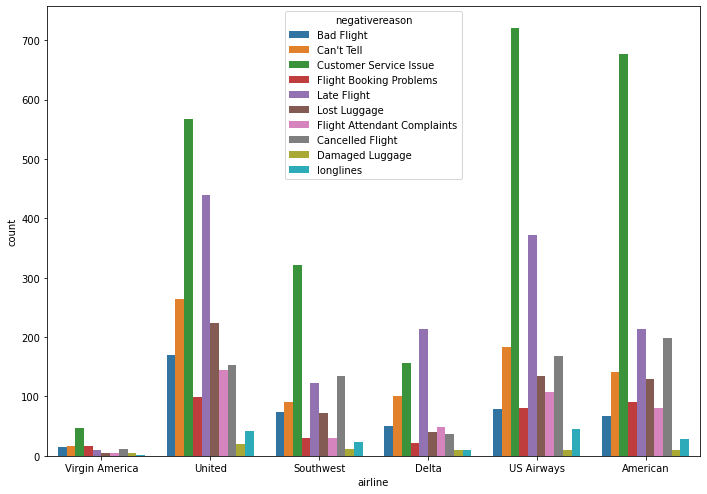

In [77]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = 'airline', data = df, hue='negativereason', ax= ax)

plt.savefig('/Users/rashidbaset/Code/Capstone/images/all_2_airline_sentiment_bar.png')

Using stratification to ensure training and test sets have same proportion of negative and positive messages.

In [79]:
# # Randomly split indexes
# index_train, index_test  = train_test_split(np.array(df.index), train_size=0.7, 
#                                             random_state=1, stratify=df['positive'])

# # Write training and test sets 
# train = df.loc[index_train,:].copy()
# test =  df.loc[index_test,:].copy()

### Stopwords

In [ ]:
stopwords_list = nltk.corpus.stopwords.words('english')

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
### CountVectorizer
cv = CountVectorizer()

cv_train_features = cv.fit_transform(train.tokens)

In [ ]:
#cv.vocabulary_

### TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### TfidfVevtorizer
tv = TfidfVectorizer(stop_words=stopwords_list)

tv_train_features = tv.fit_transform(train.tokens)

tv_train_features = tv.transform(train.tokens)

#tv_train_features = pd.DataFrame(tv_train_features)

feature_names = tv.get_feature_names()

### Extracting important features

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
m = LogisticRegressionCV(Cs = 50, penalty='l1', solver='liblinear', scoring='neg_log_loss')
m.fit(tv_train_features, positive)

In [ ]:
def get_tokens_coefs(vocab, coefs, n):
    coef_df = pd.DataFrame({'vocab': vocab, 'coef':coefs.reshape(-1)})
    return coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:n]

In [ ]:
def plot_tokens_coefs(df, ax, label):
    df.sort_values('coef').plot.barh(legend=False, ax=ax)
    ax.set_yticklabels(df['vocab'].values.tolist()[::-1])
    ax.set_title(label);

In [ ]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='white')

In [ ]:
vocab = tv.get_feature_names()
n_coefs = 15

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
fig.subplots_adjust(wspace=0.8)

for i, l in enumerate(['Negative', 'Neutral', 'Positive']):
    coef_df = get_tokens_coefs(vocab, m.coef_[i], n_coefs)
    plot_tokens_coefs(coef_df, axs[i], l)

<h2 align=center> Exploratory Data Analysis </h2>

---

### Distribution between positive and negative messages

In [ ]:
display(train['airline_sentiment'].value_counts())
train['airline_sentiment'].value_counts(normalize=True).round(2)

In [ ]:
table1 = pd.crosstab(train['airline_sentiment'], train['airline'])
display(table1)
table2 = pd.crosstab(train['airline_sentiment'], train['airline'], normalize='columns').round(3)
display(table2)

In [ ]:

ax = sns.countplot(y=train['airline_sentiment'],label="Count")
N, P = train['airline_sentiment'].value_counts()
print('Number of Negative: ',N)
print('Number of Positive : ',P)

ax.savefig('sentiment_count.png')

### Need to fix this

In [ ]:
df.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))

#plt.savefig('airline_count.png')

### Sentiment by each Airline

In [ ]:
def plot_sub_sentiment(Airline):
    df=train[train['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','positive'])
    plt.ylabel('Sentiment Count')
    plt.xlabel('Sentiment')
    plt.title('Count of Sentiment of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

#plt.savefig('airline_sentiment.png')

##### Breakdown for that month

- Count size of all sentiments between all airlines is pretty balanced with exception of Virgin America with less than 50%.
- Most airlines have 60% more negative sentiments than others with exception of Southwest, Delta, and Virgin. 
- 3 of 6 airlines have signficantly higher number of *negative* sentiment, United, US Airways, American
- US Airways:
    - Signficantly more negatives than positives (Least number of positives, 2nd to most negatives)
    - Similar pattern as American in number of neutral and positive classifications
- American:
    - 3rd to most negatives behind US Airways and United. 
    - More neutral's than positives
- Virgin America:
    - Proportional balance between all 3 sentiments and the lowest count of all sentiments of all airlines.
- Southwest:
    - Almost Proportional number of sentiments for neutral and positive.
    - Greater than 50% negative

Due to the severity of imbalance between tweets that have been retweeted at least 5 times and no retweets, 

<h2 align=center> Data Visualization </h2>

---

### Count from 'all reasons' columns

In [ ]:
NR_Count=dict(train['negativereason'].value_counts(sort=False))

In [ ]:
def NR_Count(Airline):
    if Airline=='All':
        df = train
    else:
        df = train[train['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(train['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

df=train[train['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

In [ ]:
new_df=train[train['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#plt.savefig('wordcloud_neg.png')

In [ ]:
new_df=train[train['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#plt.savefig('wordcloud_pos.png')